In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df = pd.read_csv('Redwine.csv',sep = ';')

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


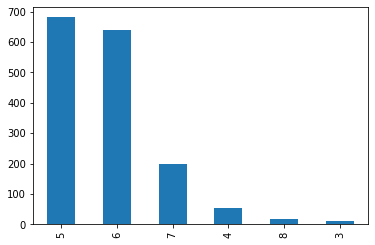

In [4]:
df['quality'].value_counts().plot(kind = 'bar')
plt.show()

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [7]:
df.corr()[df.corr() > 0.6]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,NaN,0.671703,NaN,NaN,NaN,NaN,0.668047,NaN,NaN,NaN,NaN
volatile acidity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,0.671703,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.667666,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.667666,1.000000,NaN,NaN,NaN,NaN,NaN
density,0.668047,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


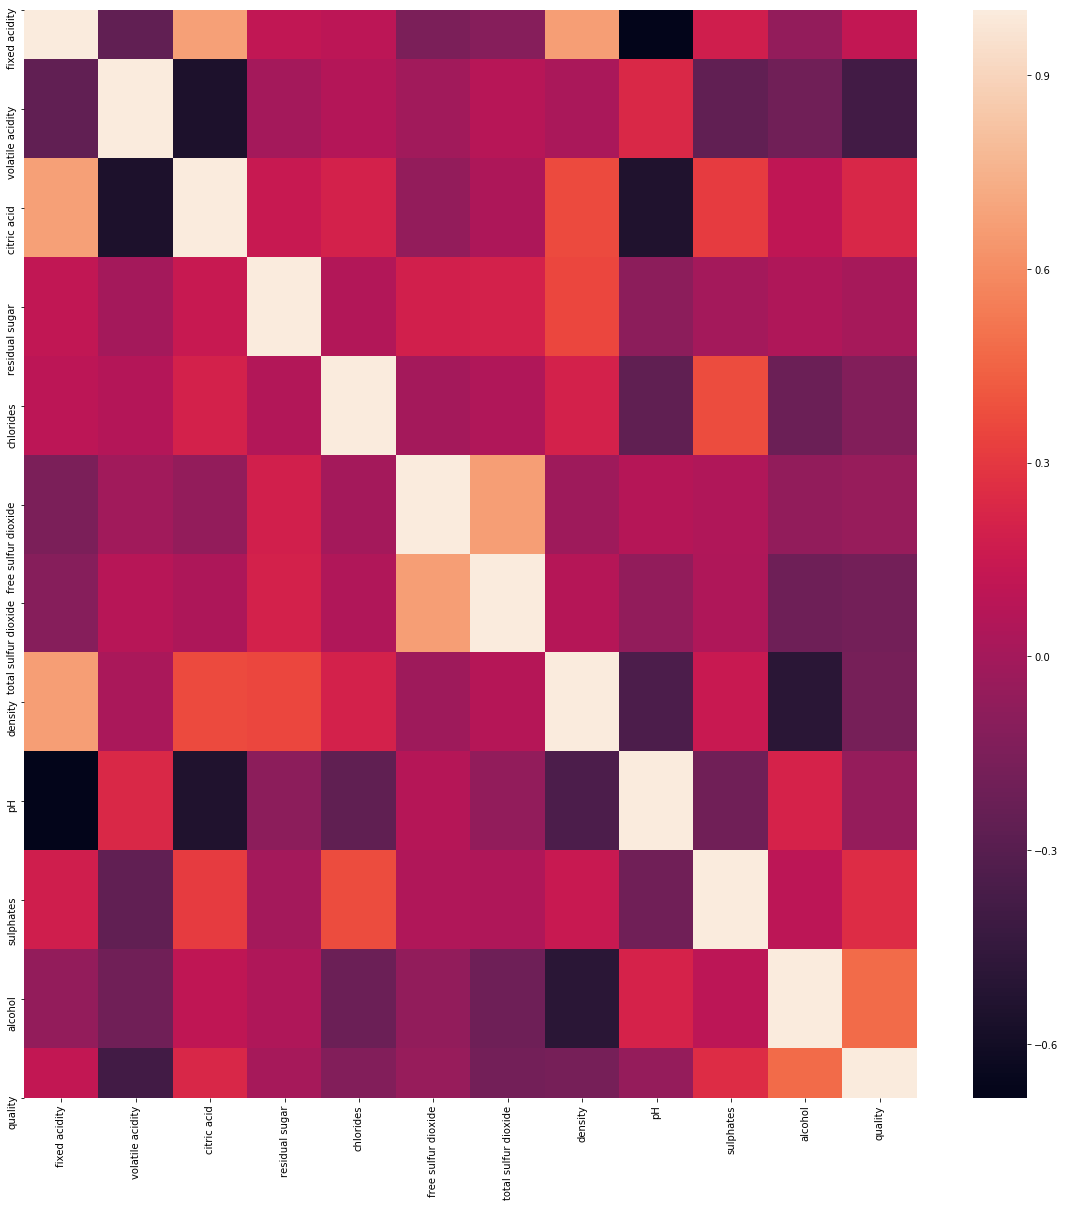

In [8]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr())
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
X = df.iloc[:,:11].values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [12]:
y = df.iloc[:,-1].values
y

array([5, 5, 5, ..., 6, 5, 6])

In [13]:
X.shape

(1599, 11)

In [14]:
y.shape

(1599,)

In [15]:
y[1500]

5

In [16]:
scaler = MinMaxScaler()

In [17]:
X = scaler.fit_transform(X)
X

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [19]:
X_train.shape

(1119, 11)

In [20]:
X_test.shape

(480, 11)

In [21]:
y_train.shape

(1119,)

In [22]:
y_test.shape

(480,)

# svc algorithm

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set res   ults
y_pred = classifier.predict(X_test)

# Making the confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
cm

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  10,   5,   0,   0],
       [  0,   0, 164,  37,   0,   0],
       [  0,   0,  86, 116,   0,   0],
       [  0,   0,   3,  52,   0,   0],
       [  0,   0,   0,   5,   0,   0]])

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.82      0.62      0.70       265
           6       0.57      0.54      0.56       215
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.58       480
   macro avg       0.23      0.19      0.21       480
weighted avg       0.71      0.58      0.64       480



/home/karthik/anaconda3/envs/tf200cpu/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [26]:
accuracy_score(y_pred,y_test)

0.5833333333333334

In [27]:
grid_param = {
    'C': [1,2,3,10],
    'gamma': ['auto','scale'],
    'kernel' : ['linear','poly','rbf','sigmoid']
}

In [28]:
grid = GridSearchCV(SVC(),grid_param, cv = 5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 2, 3, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
grid.best_params_

{'C': 3, 'gamma': 'scale', 'kernel': 'rbf'}

In [30]:
classifier = SVC(C = 10, gamma = 'scale', kernel = 'rbf')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
cm

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0],
       [  2,  11, 162,  72,   6,   0],
       [  0,   3,  38, 110,  29,   2],
       [  0,   1,   0,  19,  19,   3],
       [  0,   0,   0,   0,   1,   0]])

In [31]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.81      0.64      0.71       253
           6       0.54      0.60      0.57       182
           7       0.35      0.45      0.39        42
           8       0.00      0.00      0.00         1

    accuracy                           0.61       480
   macro avg       0.28      0.28      0.28       480
weighted avg       0.66      0.61      0.63       480



In [32]:
accuracy_score(y_pred,y_test)

0.60625

# random forest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
cm

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0],
       [  2,  10, 164,  47,   3,   0],
       [  0,   4,  37, 147,  28,   2],
       [  0,   1,   0,   7,  24,   3],
       [  0,   0,   0,   0,   0,   0]])

In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.82      0.73      0.77       226
           6       0.73      0.67      0.70       218
           7       0.44      0.69      0.53        35
           8       0.00      0.00      0.00         0

    accuracy                           0.70       480
   macro avg       0.33      0.35      0.33       480
weighted avg       0.75      0.70      0.72       480



/home/karthik/anaconda3/envs/tf200cpu/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [36]:
accuracy_score(y_pred,y_test)

0.6979166666666666

In [37]:
grid_param = {
             'criterion': ['gini', 'entropy'],
             'max_depth': [4, 5 ,10],
             'n_estimators': [100, 150, 200]
}

In [38]:
grid = GridSearchCV(RandomForestClassifier(),grid_param, cv = 3)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [39]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 150}

In [40]:
model = RandomForestClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 100 )
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
cm

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0],
       [  2,  12, 164,  50,   2,   0],
       [  0,   2,  36, 144,  28,   2],
       [  0,   1,   1,   7,  24,   3],
       [  0,   0,   0,   0,   1,   0]])

In [41]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.82      0.71      0.76       230
           6       0.71      0.68      0.70       212
           7       0.44      0.67      0.53        36
           8       0.00      0.00      0.00         1

    accuracy                           0.69       480
   macro avg       0.33      0.34      0.33       480
weighted avg       0.74      0.69      0.71       480



/home/karthik/anaconda3/envs/tf200cpu/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [42]:
accuracy_score(y_pred,y_test)

0.6916666666666667

# decision treee classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [44]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[  0,   0,   0,   0,   0,   0],
       [  1,   1,   8,   9,   0,   0],
       [  1,  11, 141,  49,   5,   1],
       [  0,   2,  40, 115,  19,   2],
       [  0,   1,  12,  29,  30,   2],
       [  0,   0,   0,   0,   1,   0]])

In [45]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.07      0.05      0.06        19
           5       0.70      0.68      0.69       208
           6       0.57      0.65      0.61       178
           7       0.55      0.41      0.47        74
           8       0.00      0.00      0.00         1

    accuracy                           0.60       480
   macro avg       0.31      0.30      0.30       480
weighted avg       0.60      0.60      0.60       480



/home/karthik/anaconda3/envs/tf200cpu/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [46]:
accuracy_score(y_pred,y_test)

0.5979166666666667

In [51]:
param_grid = { 
    'criterion':['gini','entropy'],
    'max_depth':[5,10,15,20],
}

In [52]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=3)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20]},
             pre_disp

In [53]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [56]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
cm

array([[  1,   0,   3,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0],
       [  1,  10, 144,  64,   4,   1],
       [  0,   4,  52, 122,  29,   1],
       [  0,   0,   1,  16,  22,   3],
       [  0,   0,   0,   0,   0,   0]])

In [57]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.50      0.25      0.33         4
           4       0.07      0.50      0.12         2
           5       0.72      0.64      0.68       224
           6       0.60      0.59      0.60       208
           7       0.40      0.52      0.45        42
           8       0.00      0.00      0.00         0

    accuracy                           0.60       480
   macro avg       0.38      0.42      0.36       480
weighted avg       0.64      0.60      0.62       480



/home/karthik/anaconda3/envs/tf200cpu/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [58]:
accuracy_score(y_pred,y_test)

0.6041666666666666